In [1]:
# pip install pyscreenshot
# pip install opencv-python
# pip install imutils
# pip install cmake
# pip install dlib
# pip install git+https://github.com/ageitgey/face_recognition_models

# If error with version, using pip install Pillow==6.1

In [2]:
from skimage.measure import compare_ssim
import pyscreenshot as ImageGrab
import imutils
import cv2
import time
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
def image_resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)

    # return the resized image
    return resized

In [4]:
# time.sleep(3)
# im = ImageGrab.grab(bbox=(1750, 875,1750+100,875+100))  # X1,Y1,X2,Y2
# im.save('a1.png')
# im.show()
# time.sleep(3)
# im = ImageGrab.grab(bbox=(1750, 875,1750+100,875+100))
# im.save('a2.png')
# im.show()
# time.sleep(3)
# im = ImageGrab.grab(bbox=(1750, 875,1750+100,875+100))
# im.save('a3.png')
# im.show()
# time.sleep(3)
# im = ImageGrab.grab(bbox=(1750, 875,1750+100,875+100))
# im.save('a4.png')
# im.show()

In [5]:
def img_diff(imageA, imageB):
    max_w, max_h = None, None
    if imageA.shape[:2] != imageB.shape[:2]:
        max_w = max(imageA.shape[0], imageB.shape[0])
        max_h = max(imageA.shape[1], imageB.shape[1])
    
    # convert the images to grayscale
    if max_w or max_h:
        grayA = cv2.cvtColor(
            imutils.resize(imageA, width=max_w, height=max_h), cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(
            imutils.resize(imageB, width=max_w, height=max_h), cv2.COLOR_BGR2GRAY)
        if grayA.shape != grayB.shape:
            gray_max_w = max(grayA.shape[0], grayB.shape[0])
            gray_max_h = max(grayA.shape[1], grayB.shape[1])
            right_a, bottom_a = gray_max_h-grayA.shape[1],  gray_max_w-grayA.shape[0]
            right_b, bottom_b = gray_max_h-grayB.shape[1],  gray_max_w-grayB.shape[0]
            if (bottom_a, right_a) != (0, 0):
                grayA = cv2.copyMakeBorder(
                    grayA, 0, bottom_a, 0, right_a,
                    cv2.BORDER_CONSTANT, value=(0, 0, 0))
            if (bottom_b, right_b) != (0, 0):
                o_grayB = grayB.copy()
                grayB = cv2.copyMakeBorder(
                    grayB, 0, bottom_b, 0, right_b,
                    cv2.BORDER_CONSTANT, value=(0, 0, 0))
    else:
        grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
        
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")
    print("SSIM: {}".format(score))
    
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
    # show the output images
    plt.subplot(221), plt.imshow(imutils.opencv2matplotlib(imageA)), plt.title('A')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.subplot(222), plt.imshow(imutils.opencv2matplotlib(imageB)), plt.title('B')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.subplot(223), plt.imshow(diff, cmap='gray'), plt.title('diff')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.subplot(224), plt.imshow(thresh, cmap='gray'), plt.title('thresh')
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.show()

SSIM: 0.7164847643527846


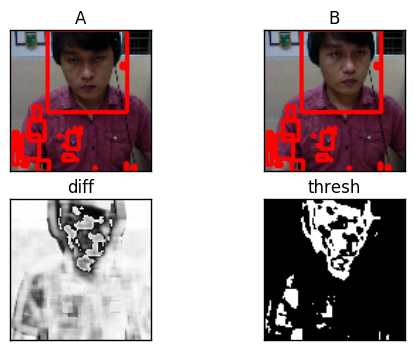

In [6]:
# load the two input images
imageA = cv2.imread('a1.png')
imageB = cv2.imread('a2.png')

img_diff(imageA, imageB)

SSIM: 0.30386706615856307


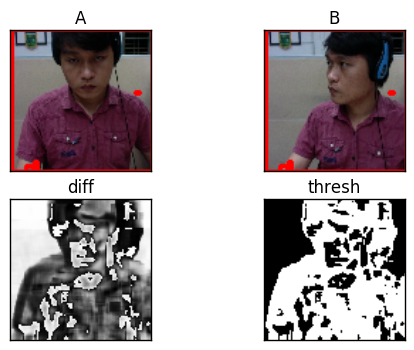

In [7]:
# load the two input images
imageA = cv2.imread('a1.png')
imageB = cv2.imread('a3.png')

img_diff(imageA, imageB)

SSIM: 0.3514928717711592


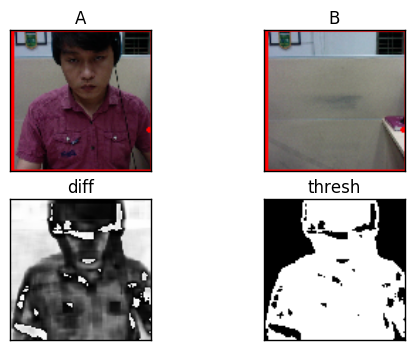

In [8]:
# load the two input images
imageA = cv2.imread('a1.png')
imageB = cv2.imread('a4.png')

img_diff(imageA, imageB)